<a href="https://colab.research.google.com/github/thekishanpatel/Projects/blob/master/New_Headlines_and_More_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

In an age where media is being critizied, I made a simple sentiment analysis tool that grabs headlines from NYT and Reuters based on a certain topic, and then uses pre-trained classifiers to give a 'sentiment' score on the headlines. The idea was to see if one or both of the news-sources have a bias for or against the topic. 

This was merely a practice for me to learn using NLP libraries and applying Sentiment Analysis, something I wanted to get comfortable with prior to applying it to my larger project. 

# **Import Libraries**

In [0]:
from textblob import TextBlob
import numpy as np
import pandas as pd
import nltk
from nltk import *
from nltk.text import Text
import matplotlib.pyplot as plt
import re as re
%matplotlib inline

import requests
from bs4 import BeautifulSoup

# **Get Topic From User**

In [3]:
inp = input('Enter topic you want to search:')
inp = re.sub(' ', '+', inp)

Enter topic you want to search:bernie


# **Get the Headlines from the Two Sites**

In [0]:
nytu = 'https://www.nytimes.com/search?query=' + inp
nytuparent = 'https://www.nytimes.com'
pge = requests.get(nytu)
soup = BeautifulSoup(pge.content, 'html.parser')
wl = soup.findAll('div', attrs={'class':'css-e1lvw9'})
headlines = []
links = []
for a in wl:
  hl = a.find('h4', attrs={'class':'css-2fgx4k'})
  link = a.find('a')
  headlines.append(hl.get_text())
  link = nytuparent + link.get('href')
  links.append(link)
nytpd = pd.DataFrame({'Headlines' : headlines, 'Links' : links})

In [0]:
ru = 'https://www.reuters.com/search/news?blob=' + inp
ruparent = 'https://www.reuters.com'
pge = requests.get(ru)
soup = BeautifulSoup(pge.content, 'html.parser')
wl1 = soup.findAll('div', attrs={'class':'search-result-content'})
headlines = []
links = []
for a in wl1:
  hl = a.find('h3', attrs={'class':'search-result-title'})
  link = a.find('a')
  link = ruparent + link.get('href')
  headlines.append(hl.get_text())
  links.append(link)
reutpd = pd.DataFrame({'Headlines' : headlines, 'Links' : links})

# **Build Classifier**

In [6]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
def sentiment(data):
  senti = SentimentIntensityAnalyzer();
  hl = data['Headlines'].values
  n = len(hl)
  Score = []

  for i in range(0, n, 1):
    s = senti.polarity_scores(hl[i])
    Score.append(s['compound'])
  return Score

In [0]:
def sentiment2(data):
  hl = data['Headlines'].values
  n = len(hl)
  Score = []

  for i in range(0, n, 1):
    s = TextBlob(hl[i])
    Score.append(s.sentiment.polarity)
  return Score

In [0]:
def comment(data):
  avg = data['Average Score'].values; num = len(avg)
  comment = []; p = 'Positive'; n = 'Negative'; neu = 'Neutral';
  
  for i in range(0, num, 1):
    if avg[i] > 0.05: 
      comment.append(p)
    elif (-0.05 <= avg[i] <= 0.05):
      comment.append(neu)
    else:
      comment.append(n)
  return comment

In [0]:
nytScore = sentiment(nytpd); nytpd.insert(1,"Score",nytScore)
reutScore = sentiment(reutpd); reutpd.insert(1,"Score",reutScore)

nytScore2 = sentiment2(nytpd); nytpd.insert(2,"Score2",nytScore2)
reutScore2 = sentiment2(reutpd); reutpd.insert(2,"Score2",reutScore2)

In [0]:
nytpd.insert(3,'Average Score', (nytpd.Score+nytpd.Score2)/2)
reutpd.insert(3,'Average Score', (reutpd.Score+reutpd.Score2)/2)

In [0]:
nytcmt = comment(nytpd); nytpd.insert(4, 'Review', nytcmt)
reutcmt = comment(reutpd); reutpd.insert(4, 'Review', reutcmt)

# **Results**

In [13]:
nytpd

,Headlines,Score,Score2,Average Score,Review,Links
0,Don’t Doubt Bernie,-0.3612,0.00,-0.18060,Negative,https://www.nytimes.com/2020/02/23/opinion/ber...
1,The Case for Bernie Sanders,0.0000,0.00,0.00000,Neutral,https://www.nytimes.com/2020/02/27/opinion/ber...
2,How Bernie Sanders Won Nevada,0.5719,0.00,0.28595,Positive,https://www.nytimes.com/interactive/2020/02/23...
3,Imagine Bernie Sanders in the Oval Office,0.0000,0.00,0.00000,Neutral,https://www.nytimes.com/2020/02/25/opinion/ber...
4,Will Latinos Buy Into ‘Tío Bernie’s’ Socialism?,0.0000,0.00,0.00000,Neutral,https://www.nytimes.com/2020/02/20/opinion/ber...
5,Bernie Sanders Wins the Nevada Caucuses,0.5719,0.30,0.43595,Positive,https://www.nytimes.com/video/us/elections/100...
6,Bernie Sanders Confronts ‘Bad Vote’ on Guns,-0.2263,-0.70,-0.46315,Negative,https://www.nytimes.com/video/us/elections/100...
7,President Bernie Sanders?,0.0000,0.00,0.00000,Neutral,https://www.nytimes.com/2020/02/11/opinion/ber...
8,Tonight’s Democratic Debate: Everyone vs. Bern...,0.0000,0.00,0.00000,Neutral,https://www.nytimes.com/interactive/2020/02/25...
9,Full Video: Bernie Sanders Rally in Texas,0.0000,0.35,0.17500,Positive,https://www.nytimes.com/video/us/elections/100...


In [14]:
reutpd

,Headlines,Score,Score2,Average Score,Review,Links
0,Breakingviews - Cox: Who’s afraid of a Preside...,0.0000,-0.600000,-0.300000,Negative,https://www.reuters.com/article/us-usa-politic...
1,False claim: Photo shows Bernie Sanders at 196...,-0.5106,-0.400000,-0.455300,Negative,https://www.reuters.com/article/idUSKCN20K1PH
2,"Bernie Sanders 'up and about,' will be in next...",0.0000,0.000000,0.000000,Neutral,https://www.reuters.com/article/idUSKBN1WI21E
3,'Nobody likes him': Hillary Clinton bashes Ber...,0.4215,0.000000,0.210750,Positive,https://www.reuters.com/article/idUSKBN1ZK233
4,UPDATE 2-'Nobody likes him' - Hillary Clinton ...,0.4215,0.000000,0.210750,Positive,https://www.reuters.com/article/idUSL1N29Q0WK
5,Florida man gets 15 months for threatening to ...,-0.8442,0.000000,-0.422100,Negative,https://www.reuters.com/article/idUSKCN1VD2AG
6,Bernie Sanders: Will not scale down campaign a...,-0.4767,-0.155556,-0.316128,Negative,https://www.reuters.com/article/idUSKBN1WO2TX
7,Bernie Sanders proposes canceling $81 billion ...,-0.3612,0.000000,-0.180600,Negative,https://www.reuters.com/article/idUSKCN1VL0QL
8,Bernie Sanders accuses Walmart of paying 'star...,-0.3400,0.000000,-0.170000,Negative,https://www.reuters.com/article/idUSL2N23C0W9
9,How Bernie Sanders’ passionate base revitalize...,0.5267,-0.425000,0.050850,Positive,https://www.reuters.com/article/idUSKBN2030CL


In [0]:
reuhls = reutpd["Headlines"].values
reulinks = reutpd["Links"].values

In [16]:
reulinks

array(['https://www.reuters.com/article/us-usa-politics-sanders-breakingviews/breakingviews-cox-whos-afraid-of-a-president-bernie-sanders-idUSKBN1ZX20B',
       'https://www.reuters.com/article/idUSKCN20K1PH',
       'https://www.reuters.com/article/idUSKBN1WI21E',
       'https://www.reuters.com/article/idUSKBN1ZK233',
       'https://www.reuters.com/article/idUSL1N29Q0WK',
       'https://www.reuters.com/article/idUSKCN1VD2AG',
       'https://www.reuters.com/article/idUSKBN1WO2TX',
       'https://www.reuters.com/article/idUSKCN1VL0QL',
       'https://www.reuters.com/article/idUSL2N23C0W9',
       'https://www.reuters.com/article/idUSKBN2030CL'], dtype=object)

In [0]:
pge = requests.get(reulinks[1])
soup = BeautifulSoup(pge.content, 'html.parser')
t = soup.find('div', attrs={'class':'StandardArticleBody_body'})

In [18]:
text = []
for l in reulinks:
  print(l)
  pge = requests.get(l)
  soup = BeautifulSoup(pge.content, 'html.parser')
  t = soup.find('div', attrs={'class':'StandardArticleBody_body'})
  text.append(t.text)

https://www.reuters.com/article/us-usa-politics-sanders-breakingviews/breakingviews-cox-whos-afraid-of-a-president-bernie-sanders-idUSKBN1ZX20B
https://www.reuters.com/article/idUSKCN20K1PH
https://www.reuters.com/article/idUSKBN1WI21E
https://www.reuters.com/article/idUSKBN1ZK233
https://www.reuters.com/article/idUSL1N29Q0WK
https://www.reuters.com/article/idUSKCN1VD2AG
https://www.reuters.com/article/idUSKBN1WO2TX
https://www.reuters.com/article/idUSKCN1VL0QL
https://www.reuters.com/article/idUSL2N23C0W9
https://www.reuters.com/article/idUSKBN2030CL


In [0]:
r1 = re.compile("[.;:!\'?,\"()\[\]]")
r2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def process(text):
  text = [r1.sub("", t.lower()) for t in text]
  text = [r2.sub(" ", t) for t in text]
  return text

In [0]:
text = process(text)

In [21]:
nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def insttext(textarray):
  tokens = nltk.tokenize.word_tokenize(textarray)
  t1 = Text(tokens)
  return t1

In [0]:
t1 = insttext(text[0])

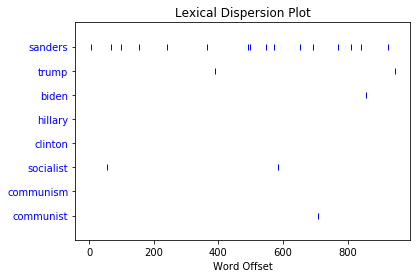

In [26]:
t1.dispersion_plot(["sanders", "trump", "biden", "hillary", "clinton", "socialist", "communism", "communist"])

In [27]:
t1.concordance("socialist")

Displaying 2 of 2 matches:
rlier elected him the first avowed socialist mayor of a biggish american city d
more marxist he campaigned for the socialist workers party which admired leon t


In [28]:
t1.concordance("communist")

Displaying 1 of 1 matches:
perhaps communitarian but far from communist maybe he used his sympathies with 


In [33]:
t1.concordance("trump")

Displaying 2 of 2 matches:
termine who gets to challenge donald trump for the presidency in november if he
ation – the way republicans have for trump ’ s supreme court nominations – he w
